# Analysing the 1D shock tube test

Sackur–Tetrode equation: entropy of an monatomic ideal gas ($\gamma = 5/3$)
$$
\frac{S}{k_{\rm B} N} = \ln
\left[ \frac{V}{N} \left(\frac{4\pi m}{3h^2}\frac{U}{N}\right)^{3/2}\right]+
{\frac{5}{2}}
$$
Specific entropy expressed in terms of pressure and density
$$
s = \frac{k_B}{m_H} \left\{ \ln\left[m_H^4 \left(\frac{2\pi}{h^2}\right)^{3/2}\frac{P}{\rho^{\gamma}}\right] + \frac{5}{2} \right\}
$$

In [1]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import matplotlib.pyplot as plt
import unyt as u

import richio
import _nb
import dev

In [2]:
!ls /home/hey4/rich_tde/data/raw/ShockTubeIdealGasGamma1.001

PL1.0PR0.000DL1.0DR0.250  PL1.0PR0.051DL1.0DR0.297  PL1.0PR0.255DL1.0DR0.475
PL1.0PR0.001DL1.0DR1.000  PL1.0PR0.055DL1.0DR1.000  PL1.0PR0.302DL1.0DR0.513
PL1.0PR0.002DL1.0DR1.000  PL1.0PR0.067DL1.0DR0.311  PL1.0PR0.336DL1.0DR1.000
PL1.0PR0.003DL1.0DR1.000  PL1.0PR0.078DL1.0DR1.000  PL1.0PR0.359DL1.0DR0.559
PL1.0PR0.004DL1.0DR1.000  PL1.0PR0.084DL1.0DR0.328  PL1.0PR0.428DL1.0DR0.613
PL1.0PR0.006DL1.0DR1.000  PL1.0PR0.100DL1.0DR0.125  PL1.0PR0.483DL1.0DR1.000
PL1.0PR0.009DL1.0DR1.000  PL1.0PR0.104DL1.0DR0.345  PL1.0PR0.516DL1.0DR0.678
PL1.0PR0.011DL1.0DR0.260  PL1.0PR0.113DL1.0DR1.000  PL1.0PR0.629DL1.0DR0.759
PL1.0PR0.013DL1.0DR1.000  PL1.0PR0.127DL1.0DR0.365  PL1.0PR0.695DL1.0DR1.000
PL1.0PR0.018DL1.0DR1.000  PL1.0PR0.152DL1.0DR0.388  PL1.0PR0.782DL1.0DR0.863
PL1.0PR0.023DL1.0DR0.271  PL1.0PR0.162DL1.0DR1.000  PL1.0PR0.998DL1.0DR0.999
PL1.0PR0.026DL1.0DR1.000  PL1.0PR0.182DL1.0DR0.413  PL1.0PR0.999DL1.0DR1.000
PL1.0PR0.036DL1.0DR0.284  PL1.0PR0.216DL1.0DR0.442
PL1.0PR0.038DL1.0DR1.000 

In [82]:
snap_dir = '/home/hey4/rich_tde/data/raw/ShockTubeIdealGasGamma1.001/PL3792.7PR0.1000DL1.0DR0.125'
!ls $snap_dir

leftdensity.txt    snap_12.h5	 snap_18       snap_22.pvtu  snap_5.h5
leftpressure.txt   snap_12.pvtu  snap_18.h5    snap_23	     snap_5.pvtu
rightdensity.txt   snap_13	 snap_18.pvtu  snap_23.h5    snap_6
rightpressure.txt  snap_13.h5	 snap_19       snap_23.pvtu  snap_6.h5
snap_0		   snap_13.pvtu  snap_19.h5    snap_24	     snap_6.pvtu
snap_0.h5	   snap_14	 snap_19.pvtu  snap_24.h5    snap_7
snap_0.pvtu	   snap_14.h5	 snap_2        snap_24.pvtu  snap_7.h5
snap_1		   snap_14.pvtu  snap_2.h5     snap_25	     snap_7.pvtu
snap_1.h5	   snap_15	 snap_2.pvtu   snap_25.h5    snap_8
snap_1.pvtu	   snap_15.h5	 snap_20       snap_25.pvtu  snap_8.h5
snap_10		   snap_15.pvtu  snap_20.h5    snap_3	     snap_8.pvtu
snap_10.h5	   snap_16	 snap_20.pvtu  snap_3.h5     snap_9
snap_10.pvtu	   snap_16.h5	 snap_21       snap_3.pvtu   snap_9.h5
snap_11		   snap_16.pvtu  snap_21.h5    snap_4	     snap_9.pvtu
snap_11.h5	   snap_17	 snap_21.pvtu  snap_4.h5     snap_final
snap_11.pvtu	   snap_17.h5	 snap_22      

In [83]:
snap = richio.load(os.path.join(snap_dir, 'snap_final.h5'))

## The profiles

In [84]:
from dev.rs import RiemannSolver
# Left State
rho_L = 1.0
vx_L = 0.0
P_L = 1
# Right State
rho_R = 0.125
vx_R = 0.0
P_R = 0.1
# ideal gas gamma
gamma = 5/3

gamma = dev.parse_gamma(snap_dir)
P_L, P_R, rho_L, rho_R = dev.fetch_ic(snap_dir)

# time
t = snap.time.value

# Riemann Solver
rs = RiemannSolver(rho_L, vx_L, P_L, rho_R, vx_R, P_R, gamma, t)
x, rho, vx, P = rs.solve()

x *= richio.units.system["length"]
rho *= richio.units.system["density"]
vx *= richio.units.system["velocity"]
P *= richio.units.system["pressure"]

In [114]:
# Get sh front position
i_sh = dev.get_shock_tube_front(snap.x, snap.dissipation)
x_sh = snap.x[i_sh]

# Near the neighbor of the sh front
x1 = x_sh * 1.05  # upstream
x2 = x_sh * 0.95  # downstream

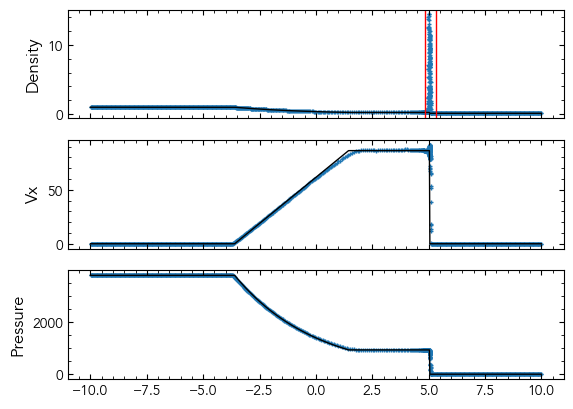

In [115]:
fig, ax = plt.subplots(3, 1, sharex=True)

ax[0].plot(x, rho, color='k')
ax[0].scatter(snap.x, snap.density, marker='+',  s=10)
ax[0].set_ylabel('Density')

ax[0].axvline(x1.value, color='r')
ax[0].axvline(x2.value, color='r')

ax[1].plot(x, vx, color='k')
ax[1].scatter(snap.x, snap.velocity_x, marker='+',  s=10)
ax[1].set_ylabel('Vx')

ax[2].plot(x, P, color='k')
ax[2].scatter(snap.x, snap.P, marker='+',  s=10)
ax[2].set_ylabel('Pressure')

plt.show()

In [116]:
# Specific entropy
s = dev.dp2s(snap.rho, snap.P, gamma=gamma)
s = (s * snap.density / snap.density).in_base('rich') # unit hack

# Specific entropy of the analytical solution
s_exact = dev.dp2s(rho, P, gamma=gamma)
# Create new quantity with rich registry
s_exact = u.unyt_array(
    s_exact.value,  # or s_exact.value
    s_exact.units,
    registry=richio.units.registry
)
s_exact = s_exact.in_base('rich')

In [117]:
# Temperature
T = snap.P / snap.density * u.mh / u.kb

# Analytical solution of temperature
T_exact = P / rho * u.mh / u.kb

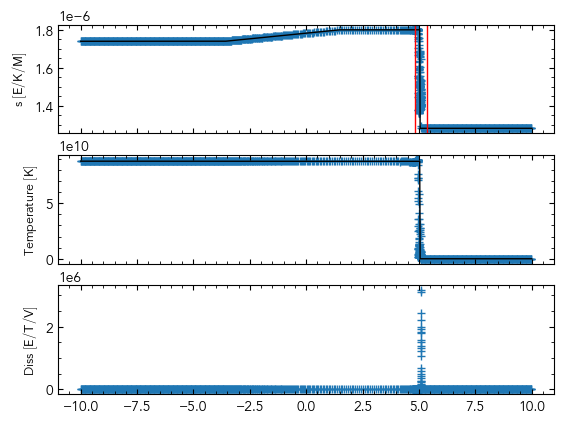

In [118]:
fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].scatter(snap.x, s, marker='+')
ax[0].plot(x, s_exact, color='k')
ax[0].set_ylabel(r's $\mathsf{[E/K/M]}$', fontsize=9)

ax[0].axvline(x1.value, color='r')
ax[0].axvline(x2.value, color='r')

ax[1].scatter(snap.x, T, marker='+')
ax[1].plot(x, T_exact, color='k')
ax[1].set_ylabel(r'Temperature $\mathsf{[K]}$', fontsize=9)

ax[2].scatter(snap.x, snap.dissipation, marker='+')
ax[2].set_ylabel(r'Diss $\mathsf{[E/T/V]}$', fontsize=9)

plt.show()

### Measure sh speed

In [119]:
_xs = []
_ts = []
for file in os.listdir(snap_dir):
    if file.endswith('h5'):
        _snap = richio.load(os.path.join(snap_dir, file))
        i_shfront = dev.get_shock_tube_front(_snap.x, _snap.dissipation) # sh front as the maximum of dissipation, good enough for sod sh; be careful in other setups
        _x = _snap.x[i_shfront]
        _t = _snap.time[0]

        _xs.append(_x)
        _ts.append(_t)

_xs = u.unyt_array(_xs)
_ts = u.unyt_array(_ts)

86.81909335832212 code_length/code_time 0.00681466425910261 code_length


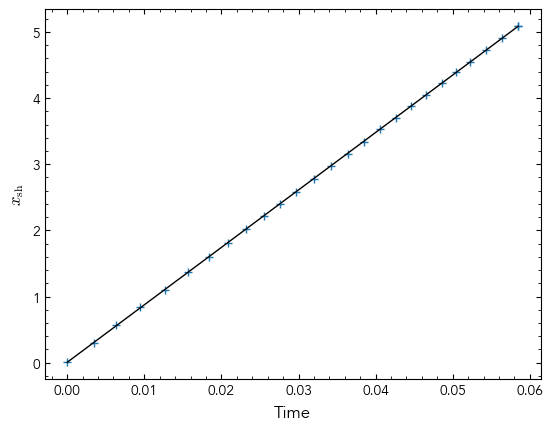

In [120]:
v_sh, b = np.polyfit(_ts.value, _xs.value, 1)
v_sh *= richio.units.lscale / richio.units.tscale
b *= richio.units.lscale
print(v_sh, b)

plt.scatter(_ts, _xs, marker='+')
_t = np.linspace(np.min(_ts), np.max(_ts), 100, True)
plt.plot(_t, _t*v_sh + b, color='k')
plt.xlabel('Time')
plt.ylabel(r'$x_\mathrm{sh}$')
plt.show()

### Verify jump conditions
$$
\frac{\rho_1}{\rho_2} = \frac{\gamma - 1}{\gamma + 1} + \frac{2}{(\gamma + 1) M^2}
$$
$$
\frac{P_2}{P_1} = \frac{2\gamma M^2}{\gamma + 1} - \frac{\gamma - 1}{\gamma + 1}
$$
$$
\frac{u_2}{u_1} = \frac{P_2}{P_1}\frac{\rho_1}{\rho_2}
$$

In [121]:
T1 = dev.get_at_x(snap, T, x=x1)
T2 = dev.get_at_x(snap, T, x=x2)
s1 = dev.get_at_x(snap, s, x=x1)
s2 = dev.get_at_x(snap, s, x=x2)
u1 = dev.get_at_x(snap, snap.sie, x=x1)
u2 = dev.get_at_x(snap, snap.sie, x=x2)
rho1 = dev.get_at_x(snap, snap.rho, x=x1)
rho2 = dev.get_at_x(snap, snap.rho, x=x2)
P1 = dev.get_at_x(snap, snap.P, x=x1)
P2 = dev.get_at_x(snap, snap.P, x=x2)
v1_lab = dev.get_at_x(snap, snap.vx, x=x1) # lab frame
v2_lab = dev.get_at_x(snap, snap.vx, x=x2)
v1_sh = v_sh - v1_lab
v2_sh = v_sh - v2_lab

In [122]:
# Mach number
P1 = dev.get_at_x(snap, snap.P, x=x1)
M = np.sqrt(rho1 * v_sh**2 / (P1 * gamma)) # M = v_sh / c_1
print("The Mach number of the sh is", M)

The Mach number of the sh is 97.0182002681355 dimensionless


In [123]:
rho1_to_rho2 = (gamma - 1)/(gamma + 1) + 2/(gamma + 1)/M**2
P2_to_P1 = (2*gamma*M**2)/(gamma + 1) - (gamma - 1)/(gamma + 1)

In [124]:
# This is mostly a sanity check
# Because the riemann solver (exact) solution gives the jump condition exactly
# And we see RICH matches the riemann solver solution very well
print(f"rho1/rho2 analytically from the Mach number: {rho1_to_rho2}")
print(f"rho1/rho2 actually in the sim: {rho1 / rho2}\n")
print(f"P2/P1 from the Mach number: {P2_to_P1}")
print(f"P2/P1 actually in the sim: {P2 / P1}")

rho1/rho2 analytically from the Mach number: 0.0006059383787040931 dimensionless
rho1/rho2 actually in the sim: 0.5099226225076613 dimensionless

P2/P1 from the Mach number: 9417.234597152737 dimensionless
P2/P1 actually in the sim: 9255.787815793774 dimensionless


In [125]:
print(f"v2/v1 which should be equal to rho1/rho2 {v2_sh / v1_sh}")

v2/v1 which should be equal to rho1/rho2 0.004597954671482449 dimensionless


In [126]:
# specific heat
cv = u.kb/u.mh/(gamma - 1)

In [127]:
s2_minus_s1 = cv * (np.log(P2_to_P1) + gamma * np.log(rho1_to_rho2))
print(f"s2 - s1 analytically from the Mach number {(s2_minus_s1).in_cgs()}")
print(f"s2 - s1 actually in the sim: {(s2 - s1).in_cgs()}") #TODO: derive sackur-tetrode equation for varying gamma

s2 - s1 analytically from the Mach number 143048914707.09213 cm**2/(K*s**2)
s2 - s1 actually in the sim: 991169475.4268082 cm**2/(K*s**2)


In [128]:
# Total dissipation rate (dissipation rate at sh front as well)
diss = snap.dissipation * snap.volume
total_diss = np.sum(diss)
print(f"The total dissipation rate is {total_diss}")

i_sh = (snap.x > x2) & (snap.x < x1)
diss_sh = np.sum(diss[i_sh])
print(f"Dissipation rate across the sh front is {diss_sh}")

The total dissipation rate is 13.102442188311935 code_length**2*code_mass/code_time**3
Dissipation rate across the sh front is 13.064056043339635 code_length**2*code_mass/code_time**3


In [129]:
# Cross section
A = (snap.box_size[4] - snap.box_size[1]) * (snap.box_size[5] - snap.box_size[2])
print(f'The cross section is: {A}')

The cross section is: 0.0004 code_length**2


### Comparison 2
$$
\mathrm{Diss}\,\mathrm{[E/T]} = (u_2 - u_1)\rho_1 v_\mathrm{sh} A
$$
subscript 1 for upstream, 2 for downstream. (Extremely strong shock)

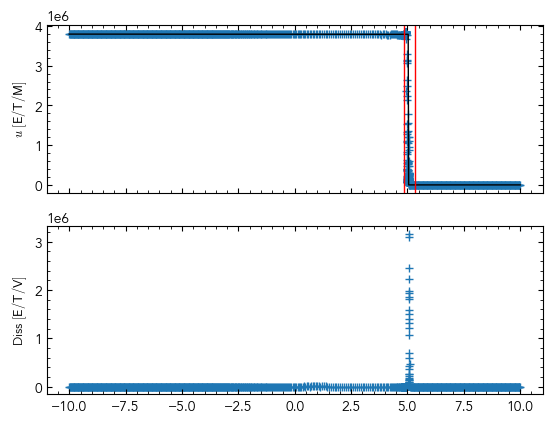

In [130]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].scatter(x=snap.x, y=snap.sie, marker='+')
ax[0].plot(x, P/rho/(gamma-1), color='k')
ax[0].set_ylabel(r'$u$ $\mathsf{[E/T/M]}$', fontsize=9)
ax[0].axvline(x1.value, color='r')
ax[0].axvline(x2.value, color='r')

ax[1].scatter(snap.x, snap.dissipation, marker='+')
ax[1].set_ylabel(r'Diss $\mathsf{[E/T/V]}$', fontsize=9)

plt.show()

In [131]:
# Total dissipation rate diagnostic
# diss_ie = (u2 - u1) * rho1 * v_sh * A
diss_ie = (u2 * rho2 * v2_sh - u1 * rho1 * v1_sh) * A # (u2 - u1)* rho1 * v_sh * A
print(diss_ie)

144.3200485282755 code_length**2*code_mass/code_time**3


In [132]:
(u2 - u1)* rho1 * v_sh * A # by rho2 v2 = rho1 v1 and v1 ~ v_sh

unyt_quantity(16387.0538511, 'code_length**2*code_mass/code_time**3')

In [133]:
diss_ie/diss_sh

unyt_quantity(11.0471088, '(dimensionless)')

### Comparison 3: Schaal+15, 16; Ryu+03
$$
\begin{gather}
E_\mathrm{diss} = \frac{1}{2} \rho_1 v_\mathrm{sh}^3 A \delta (M)
\\
\delta(M) = \frac{2}{\gamma(\gamma - 1)M^2 R} \left[\frac{2\gamma M^2 - (\gamma - 1)}{\gamma + 1} - R^\gamma\right]
\\
R = \frac{\rho_2}{\rho_1}
\end{gather}
$$

In [134]:
R = rho2/rho1
deltaM = 2/(gamma*(gamma - 1) * M**2 * R) * ((2*gamma*M**2 - (gamma - 1))/(gamma + 1) - R**gamma)
diss_schaal = 1/2*rho1*v_sh**3*A*deltaM
print(diss_schaal)

16672.948057385547 code_length**2*code_mass/code_time**3


In [135]:
print('RICH:', diss_sh, '\n', 'Schaal+16:', diss_schaal, '\n', 'Internal energy jump:', diss_ie)

RICH: 13.064056043339635 code_length**2*code_mass/code_time**3 
 Schaal+16: 16672.948057385547 code_length**2*code_mass/code_time**3 
 Internal energy jump: 144.3200485282755 code_length**2*code_mass/code_time**3


In [136]:
(u2 * rho2 - u1 * (rho2/rho1)**gamma * rho1) * v2_sh * A # Also Schaal, without the delta(M) parametrisation, just utot + pdV

unyt_quantity(147.76147738, 'code_length**2*code_mass/code_time**3')

### Near shock front

In [137]:
#The max dissipation cell
i_maxdiss = np.argmax(snap.dissipation)
print(i_maxdiss)

693


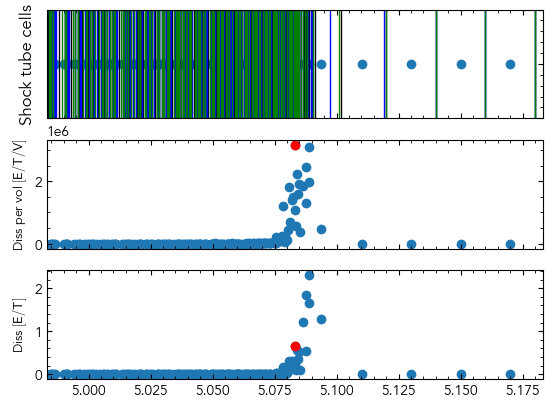

In [138]:
# Looking at the shock front
fig, ax = plt.subplots(3, 1, sharex=True)

ax[0].scatter(snap.x, np.ones_like(snap.x))
ax[0].scatter(snap.x[i_maxdiss], 1, color='r')

# Voronoi lines
i_sortx = np.argsort(snap.x)
x_sorted = snap.x[i_sortx]
ax[0].vlines((x_sorted[1:] + x_sorted[:-1])/2, ymin=0, ymax=2, color='k')

# Volume splitting
lcell = snap.volume / A
ax[0].vlines(snap.x + lcell/2, ymin=0, ymax=2, color='b')
ax[0].vlines(snap.x - lcell/2, ymin=0, ymax=2, color='g')

ax[0].set_ylabel(r'Shock tube cells')
ax[0].set_ylim(0, 2)
ax[0].set_yticklabels('')

ax[1].scatter(snap.x, snap.dissipation)
ax[1].scatter(snap.x[i_maxdiss], snap.dissipation[i_maxdiss], color='r')
ax[1].set_ylabel(r'Diss per vol $\mathsf{[E/T/V]}$', fontsize=9)

ax[2].scatter(snap.x, snap.dissipation * snap.volume)
ax[2].scatter(snap.x[i_maxdiss], snap.dissipation[i_maxdiss] * snap.volume[i_maxdiss], color='r')
ax[2].set_ylabel(r'Diss $\mathsf{[E/T]}$', fontsize=9)

plt.xlim(snap.x[i_maxdiss].value-0.1, snap.x[i_maxdiss].value+0.1)

plt.show()

In [139]:
# delta(M) as a function of M
M = 1.5
R = 1/((gamma - 1)/(gamma + 1) + 2/(gamma + 1)/M**2)
deltaM = 2/(gamma*(gamma - 1) * M**2 * R) * ((2*gamma*M**2 - (gamma - 1))/(gamma + 1) - R**gamma)
deltaM

0.08157703818782508

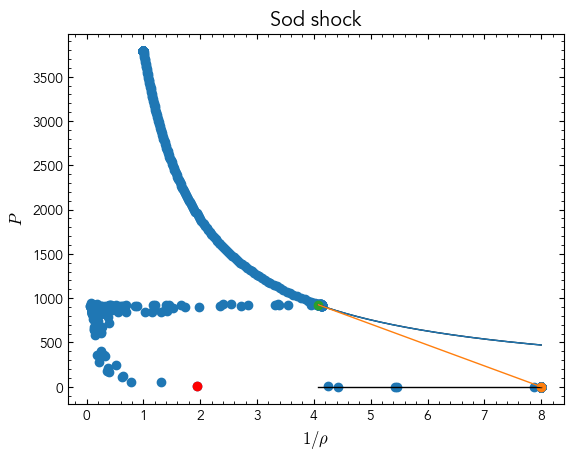

In [140]:
# P-rho^-1 diagram
def P_adiabatic(rho, P_ref, rho_ref):
    return P_ref * (rho/rho_ref)**gamma

def P_hugoniot(rho, P_ref, rho_ref): # uses rho2, P2 as reference point
    return P_ref * ((gamma + 1)*rho - (gamma - 1)*rho_ref) / ((gamma + 1)*rho_ref - (gamma - 1)*rho)

# Rayleigh line (straight line in P-v plane)
v1 = 1/rho1
v2 = 1/rho2
def P_rayleigh(v):
    return P1 + (P2 - P1)*(v - v1)/(v2 - v1)

Vspace = np.linspace(v2, v1, 1000)
plt.plot(Vspace, P_adiabatic(1/Vspace, P1, rho1), color='k')
plt.plot(Vspace, P_adiabatic(1/Vspace, P2, rho2), color='k')

plt.plot(Vspace, P_hugoniot(1/Vspace, P2, rho2))
plt.plot(Vspace, P_rayleigh(Vspace))

plt.scatter(1/snap.rho, snap.P)
plt.scatter(1/rho1, P1)
plt.scatter(1/rho2, P2)
plt.scatter(1/snap.rho[i_maxdiss], snap.P[i_maxdiss], color='r')

plt.xlabel('$1/\\rho$')
plt.ylabel('$P$')
plt.title('Sod shock')
# plt.savefig('../reports/figures/sod-shocktube-adiabat.png', dpi=200)
plt.show()

In [141]:
# Use a linear spacing for specific volume v
v_axis = np.linspace(v2, v1, 3000) 
P2 = P_hugoniot(rho2, P1, rho1)

# Calculate pressures along the v_axis
P_R = P1 + (P2 - P1) * (v_axis - v1) / (v2 - v1)
P_H = P_hugoniot(1.0 / v_axis, P_ref=P2, rho_ref=rho2)
P_A = P_adiabatic(1.0 / v_axis, P_ref=P1, rho_ref=rho1)

# Area 1: The "Lens" between Rayleigh and Hugoniot
# This represents the entropy production path deviation
A_h = np.trapezoid(P_R - P_H, v_axis)

# Area 2: The difference between Rayleigh and Adiabat
# This is much larger because P_R ends at P2_shock, not P2_adiabatic
A_p = np.trapezoid(P_R - P_A, v_axis)

In [142]:
rho2/rho1, A_h/A_p, diss_sh/diss_schaal

(unyt_quantity(1.96108185, '(dimensionless)'),
 unyt_quantity(0.99949374, '(dimensionless)'),
 unyt_quantity(0.00078355, '(dimensionless)'))